<a href="https://colab.research.google.com/github/trieyed/AI/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv("/content/classification_dataset.csv")

In [ ]:
df.head()

,Age,Income,HoursWorked,LoanApproval
0,25,30000,40,Approved
1,30,45000,45,Approved
2,35,20000,30,Denied
3,40,60000,50,Approved
4,28,25000,35,Denied


In [ ]:
#encoding LoanApproval column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Loan_encoded'] = le.fit_transform(df['LoanApproval'])

In [ ]:
df.head()

,Age,Income,HoursWorked,LoanApproval,Loan_encoded
0,25,30000,40,Approved,0
1,30,45000,45,Approved,0
2,35,20000,30,Denied,1
3,40,60000,50,Approved,0
4,28,25000,35,Denied,1


In [ ]:
#Load our X features and y label
X = df[['Age','Income','HoursWorked']].values
y = df['Loan_encoded'].values

#Split our data as training data and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=17)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

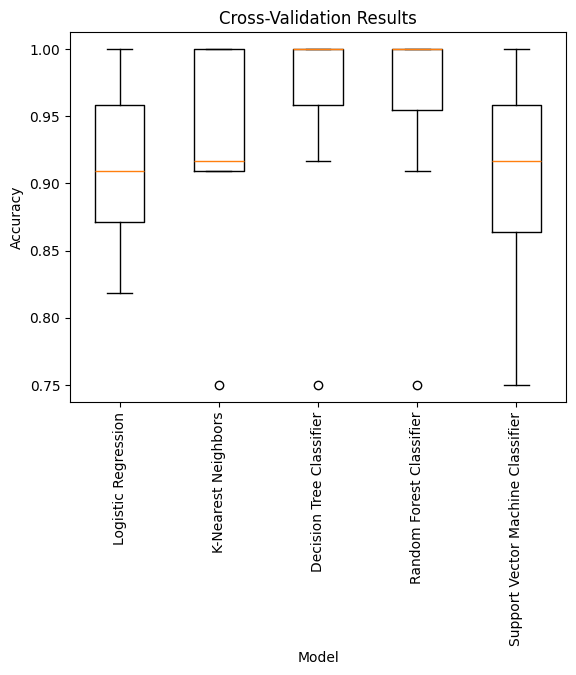

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Machine Classifier": SVC()
}


#Creating a list that will hold cross-validation scores of all models
results = []

#Creating a KFold object
#This performs training and validation for a same model for 7 times
#Every time, the validation data changes.
kf = KFold(n_splits=7, random_state=42, shuffle=True)

# Loop through the models' values
for model in models.values():

  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')

  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, tick_labels=models.keys())
plt.title("Cross-Validation Results")
plt.xlabel("Model")
plt.xticks(rotation=90)
plt.ylabel("Accuracy")
plt.show()

In [ ]:

#Create the decision tree classifier model
baseline_model = DecisionTreeClassifier()

#Fit the model to the training data
baseline_model.fit(X_train, y_train)




DecisionTreeClassifier()

In [ ]:
#Make predictions on the test set
y_pred = baseline_model.predict(X_test)

In [ ]:

#defining the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(5,55,5),
    'min_samples_split': np.arange(2,10,1),
    'min_samples_leaf': np.arange(1,10),
    'max_features': [None, 'sqrt', 'log2']
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
dtc_cv = RandomizedSearchCV(baseline_model, param_grid, cv=kf, n_jobs=-1, verbose=1, n_iter=100)

In [ ]:
dtc_cv.fit(X_train, y_train)

Fitting 7 folds for each of 100 candidates, totalling 700 fits


RandomizedSearchCV(cv=KFold(n_splits=7, random_state=42, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]),
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
                   verbose=1)

In [ ]:
#Printing the tuned parameters and validation score
print("Tuned paramaters: {}".format(dtc_cv.best_params_))
print("Tuned score: {}".format(dtc_cv.best_score_))

Tuned paramaters: {'min_samples_split': np.int64(6), 'min_samples_leaf': np.int64(3), 'max_features': None, 'max_depth': np.int64(25), 'criterion': 'entropy'}
Tuned score: 0.9761904761904762


In [ ]:
#Get the tuned model
tuned_model = dtc_cv.best_estimator_

In [ ]:
tuned_model

DecisionTreeClassifier(criterion='entropy', max_depth=np.int64(25),
                       min_samples_leaf=np.int64(3),
                       min_samples_split=np.int64(6))

In [ ]:
#Make predictions on the test set using the tuned model
y_pred_tuned = tuned_model.predict(X_test)

In [ ]:
import joblib
joblib.dump(tuned_model, 'best_loan_model.pkl')

['best_loan_model.pkl']

In [ ]:
joblib.dump(baseline_model,'baseline_model.pkl')

['baseline_model.pkl']